In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('spam.csv')

In [3]:
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
data['Spam'] = np.where(data['Category'] == 'spam', 1, 0)

In [6]:
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


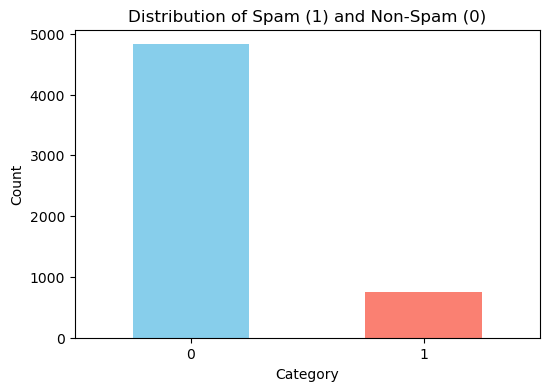

In [8]:
plt.figure(figsize=(6, 4))
data['Spam'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam (1) and Non-Spam (0)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [10]:
X = data['Message']
y = data['Spam']

In [11]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [13]:
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression()
gb_classifier = GradientBoostingClassifier()

In [14]:
svm_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [16]:
ensemble_classifier = VotingClassifier(estimators=[
    ('SVM', svm_classifier),
    ('Random Forest', rf_classifier),
    ('Multinomial Naive Bayes', nb_classifier),
    ('Logistic Regression', lr_classifier),
    ('Gradient Boosting', gb_classifier)
], voting='hard')

In [17]:
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC()),
                             ('Random Forest', RandomForestClassifier()),
                             ('Multinomial Naive Bayes', MultinomialNB()),
                             ('Logistic Regression', LogisticRegression()),
                             ('Gradient Boosting',
                              GradientBoostingClassifier())])

In [18]:
y_pred_svm = svm_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_nb = nb_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)
y_pred_ensemble = ensemble_classifier.predict(X_test)

In [19]:
models = {
        'SVM': y_pred_svm,
        'Random Forest': y_pred_rf,
        'Multinomial Naive Bayes': y_pred_nb,
        'Logistic Regression': y_pred_lr,
        'Gradient Boosting': y_pred_gb,
        'Ensemble': y_pred_ensemble
    }

In [20]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

In [21]:
print("SVM Accuracy:", accuracy_svm)
print("Random Forest Accuracy:", accuracy_rf)
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Ensemble Accuracy:", accuracy_ensemble)

SVM Accuracy: 0.9829596412556054
Random Forest Accuracy: 0.9811659192825112
Multinomial Naive Bayes Accuracy: 0.9650224215246637
Logistic Regression Accuracy: 0.9623318385650225
Gradient Boosting Accuracy: 0.9775784753363229
Ensemble Accuracy: 0.9802690582959641


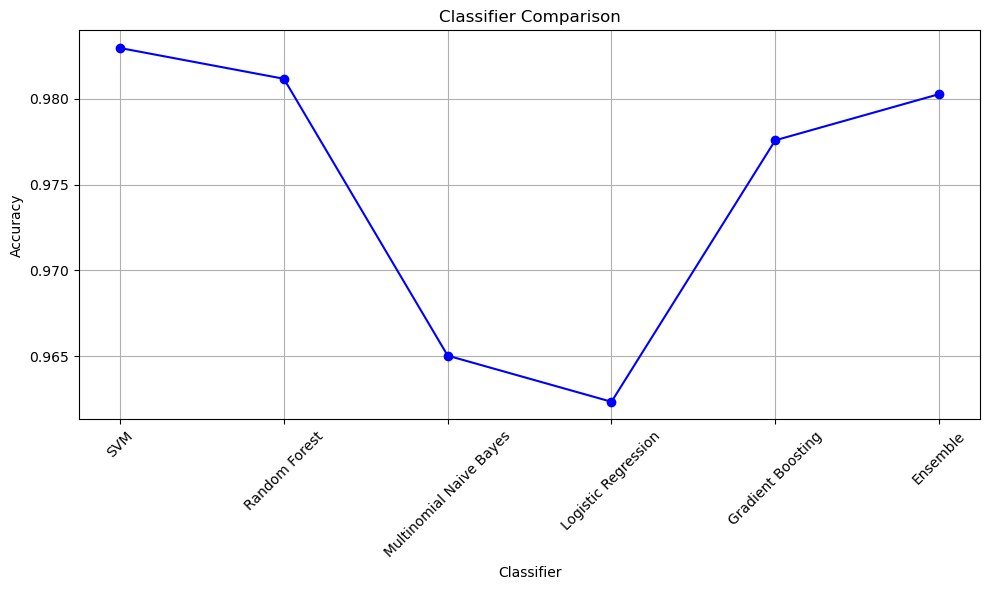

In [22]:
classifiers = ['SVM', 'Random Forest', 'Multinomial Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'Ensemble']
accuracies = [accuracy_svm, accuracy_rf, accuracy_nb, accuracy_lr, accuracy_gb, accuracy_ensemble]
plt.figure(figsize=(10, 6))
plt.plot(classifiers, accuracies, marker='o', linestyle='-', color='b')
plt.title('Classifier Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()